# <font color='#FFE15D'>**Week 15: KNN 💜⬌💛**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **🔸 Advancements in KNN**

### Search

In [2]:
from sklearn.neighbors import KDTree, BallTree, NearestNeighbors
from scipy.stats import mode

#### * KD-tree

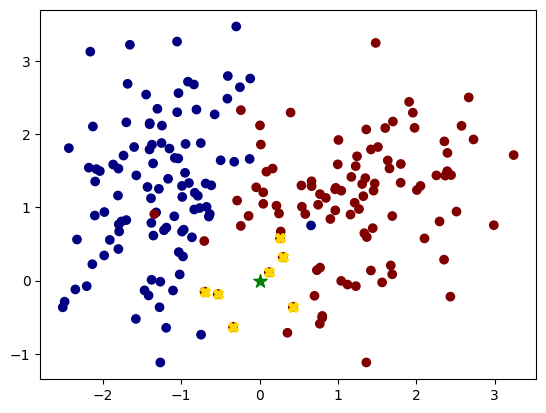

In [3]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

# Construct a KDTree
kdt = KDTree(X, leaf_size=10)

# Query
query_point = np.array([[0, 0]])
_, ind = kdt.query(query_point, k=7)

# Plot the query point
plt.scatter(query_point[0, 0], query_point[0, 1], marker='*', color='green', s=100)

# Plot the nearest neighbors
plt.scatter(X[ind, 0], X[ind, 1], marker='X', color='gold', s=50)

##### ** Decision Region

(250000, 5)
[[ 719 1598 1124  211  921]
 [ 719 1598 1124  211  921]
 [ 719 1598 1124  211  921]
 ...
 [1206  517 1822 1463 1417]
 [1206  517 1822 1463 1417]
 [1206  517 1822 1463 1417]]
(250000, 5)
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


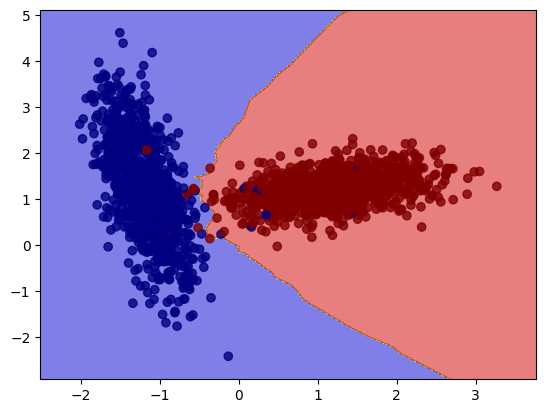

In [4]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

kdt = KDTree(X)


dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

_, ind = kdt.query(Xf, k=5)
print(ind.shape)
print(ind)

print(y[ind].shape)
print(y[ind])

labels = mode(y[ind], axis=1, keepdims=False).mode
labels = labels.reshape(xm1.shape)

plt.contourf(xm1, xm2, labels, alpha=0.5, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', alpha=0.8)

##### ** Partitioning

bounds: [-2.2  2. ]
nodes: [(0, 22, 1, 2.1)]
2.100000000000002


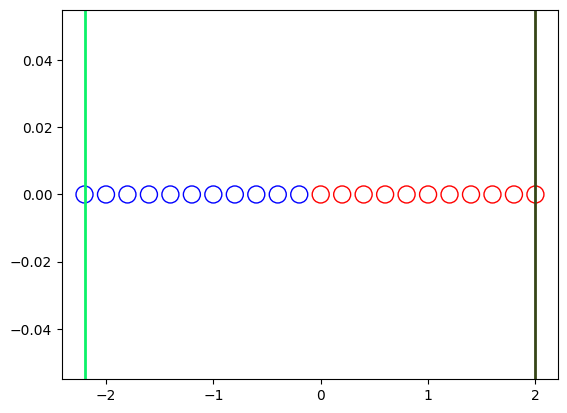

In [5]:
X = np.arange(-2.2, 2.2, 0.2)
y = np.zeros(len(X), dtype=np.int8)
y[X>=0] = 1
X = X[:, None]

colors = ['blue', 'red']
for i, xi in enumerate(X):
    plt.scatter(xi[0], 0, color='none', edgecolor=colors[y[i]], s=150)

kdt = KDTree(X, leaf_size=22)
# kdt.get_arrays()
bounds = kdt.node_bounds.base
nodes = kdt.node_data.base
print('bounds:', bounds.reshape(-1))
print('nodes:', nodes)
# print(bounds)
bounds = bounds.reshape(-1)

for bound in bounds:
    plt.axvline(bound, linewidth=2, color=np.random.rand(3))

print((X.max() - X.min())/2)

bounds: [-2.20000000e+00 -2.20000000e+00  1.77635684e-15 -2.20000000e+00
 -1.20000000e+00  1.77635684e-15  1.00000000e+00  2.00000000e+00
 -2.00000000e-01  2.00000000e+00 -1.40000000e+00 -2.00000000e-01
  8.00000000e-01  2.00000000e+00]
nodes: [( 0, 22, 0, 2.1) ( 0, 11, 0, 1. ) (11, 22, 0, 1. ) ( 0,  5, 1, 0.4)
 ( 5, 11, 1, 0.5) (11, 16, 1, 0.4) (16, 22, 1, 0.5)]
(2, 7, 1)
2.100000000000002


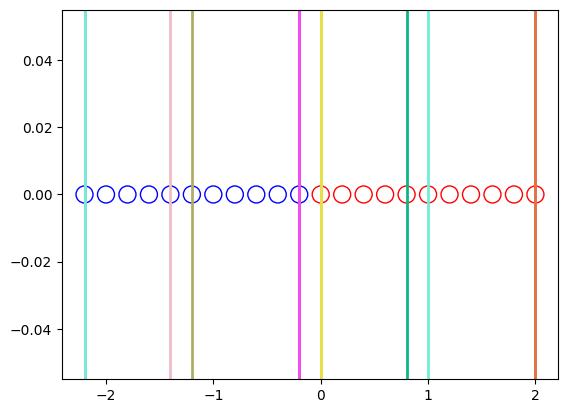

In [6]:
X = np.arange(-2.2, 2.2, 0.2)
y = np.zeros(len(X), dtype=np.int8)
y[X>=0] = 1
X = X[:, None]

colors = ['blue', 'red']
for i, xi in enumerate(X):
    plt.scatter(xi[0], 0, color='none', edgecolor=colors[y[i]], s=150)

# kdt = KDTree(X, leaf_size=10)
kdt = KDTree(X, leaf_size=5)
# kdt.get_arrays()
bounds = kdt.node_bounds.base
nodes = kdt.node_data.base
print('bounds:', bounds.reshape(-1))
print('nodes:', nodes)
print(bounds.shape)
# print(bounds)
bounds = bounds.reshape(-1)

for bound in bounds:
    plt.axvline(bound, linewidth=2, color=np.random.rand(3))

print((X.max() - X.min())/2)

#### * Ball-tree

n_features=1

X: 20
get_arrays[2]: [(0, 20, 1, 1.65308432)]
get_arrays[3]: [[[0.18806676]]]
[(0, 20, 1, 1.65308432)]
Lower band: 0:[-0.96162963]
Higher band: 20:[1.1524131]
Is leaf: 1
Radius: 1.653084317509564


Ellipsis

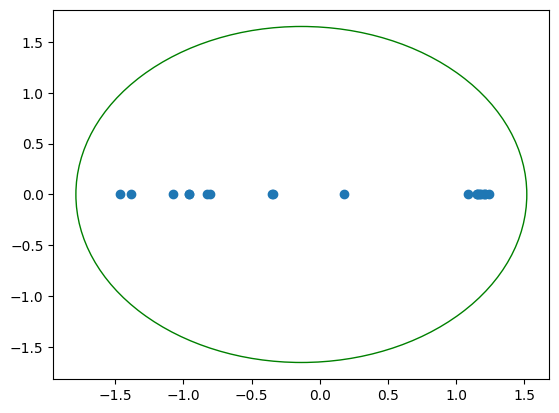

In [7]:
X, y = make_classification(
    n_samples=20,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    class_sep=1.2,
    random_state=15,
)

print(f"X: {len(X)}")#: {X}")
plt.scatter(X, X * 0)

# Construct a BallTree
bt = BallTree(X, leaf_size=22)
ga = bt.get_arrays()
# print(f"get_arrays: {ga}")
print(f"get_arrays[2]: {ga[2]}")
print(f"get_arrays[3]: {ga[3]}")

bounds = ga[2].reshape(-1)
print(bounds)

fig = plt.gcf()
ax = fig.gca()

for bound in bounds:
    # plt.axvline(bound, linewidth=2, color=np.random.rand(3))
    # ax.add_patch(
    #     plt.Circle((X[bound[0]] + bound[3]/2, 0), bound[3], color="g", fill=False)
    # )
    ax.add_patch(
        plt.Circle((X[bound[0]] + bound[3]/2, 0), bound[3], color="g", fill=False)
    )
    # print((X[bound[0]] + bound[3], 0), bound[3])
    print(f"Lower band: {bound[0]}:{X[bound[0]]}")
    print(f"Higher band: {bound[1]}:{X[bound[1]-1]}")
    print(f"Is leaf: {bound[2]}")
    print(f"Radius: {bound[3]}")


query_point = np.array([1, 1])  # Example query point
...

# Plot the query point
...

# Plot the nearest neighbors
...

n_features=2

get_arrays: (array([[ 0.6530384 ,  0.47629492],
       [ 1.38696023,  0.8058343 ],
       [ 1.90189726, -0.78964851],
       [ 1.65272555, -1.19672056],
       [ 0.90668444,  1.38478191],
       [ 0.4820365 , -1.79709502],
       [ 3.13389335, -1.58399036],
       [ 1.61457026, -0.54404362],
       [ 0.25686242, -0.918411  ],
       [ 2.19908352, -1.98586344],
       [ 1.08393603, -1.04124687],
       [ 1.39128194, -0.92418915],
       [ 0.83333572,  0.57948692],
       [-1.57284623, -2.10270566],
       [ 0.8628546 ,  0.83942873],
       [ 0.87063474,  0.94702199],
       [ 1.61103833,  2.14008246],
       [ 0.99716817,  1.95823755],
       [ 1.39311904,  0.99869052],
       [ 0.84091368, -0.55368787]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64), array([(0, 20, 1, 3.32134886)],
      dtype=[('idx_start', '<i8'), ('idx_end', '<i8'), ('is_leaf', '<i8'), ('radius', '<f8')]), array([[[ 1.1249594 , -0.16538714]]]))


Ellipsis

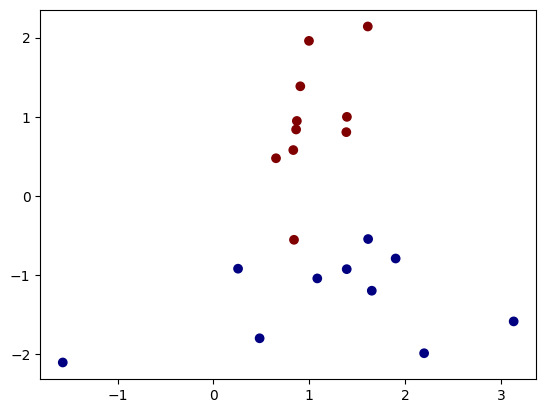

In [8]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

# Construct a BallTree
bt=BallTree(X,leaf_size=22)
ga=bt.get_arrays()
print(f"get_arrays: {ga}")

query_point = np.array([1, 1])  # Example query point
...

# Plot the query point
...

# Plot the nearest neighbors
...

#### * NearestNeigbors

In [9]:
X, _ = make_classification(n_samples=1000, n_features=10, random_state=42)

# k-d tree searcher
kdt = NearestNeighbors(n_neighbors=1, algorithm='kd_tree').fit(X)

# brute force searcher
brute = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(X)

# ball tree searcher
bt = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X)


# auto searcher
auto = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(X)

query_point = np.full((1, 10), 0.5)

In [10]:
%timeit -r 10 kdt.kneighbors(query_point)

384 μs ± 7.88 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [11]:
%timeit -r 10 brute.kneighbors(query_point)

4.66 ms ± 367 μs per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [12]:
%timeit -r 10 bt.kneighbors(query_point)

414 μs ± 25.9 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [13]:
%timeit -r 10 auto.kneighbors(query_point)

419 μs ± 17.6 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [14]:
# auto.get_params()

### Metrics

In [15]:
from scipy.stats import mode
from scipy.spatial.distance import mahalanobis

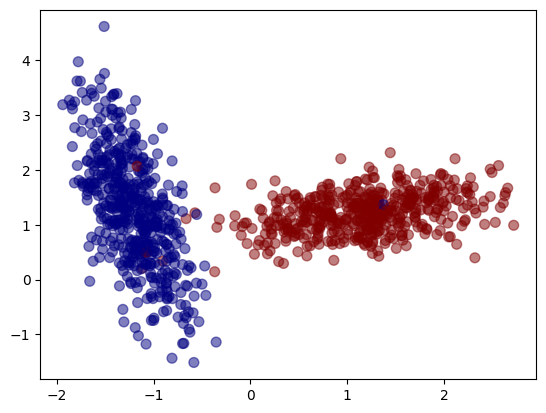

In [ ]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='jet', alpha=0.5)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='jet', marker='s')

In [17]:
class KNNClassification:
    
    def __init__(self, k, metric='euclidean'):
        self.k = k
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.inv_cov = np.linalg.inv(np.cov(X.T))
            
    def predict(self, x):
        y_hats = []
        for xi in x:
            if self.metric == 'euclidean':
                distances = np.linalg.norm(self.X - xi, axis=1)
            elif self.metric == 'mahalanobis':
                distances = np.array([mahalanobis(xi, Xi, self.inv_cov) for Xi in self.X])
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = list(map(lambda i: self.y[i], indices)) #[self.y[i] for i in indices]
            y_hat = mode(k_nearest_labels, keepdims=False).mode
            y_hats.append(y_hat)
        return np.array(y_hats)

In [18]:
model = KNNClassification(10, metric='mahalanobis')
model.fit(x_train, y_train)

y_hat = model.predict(x_test)
np.sum(y_hat == y_test)

988

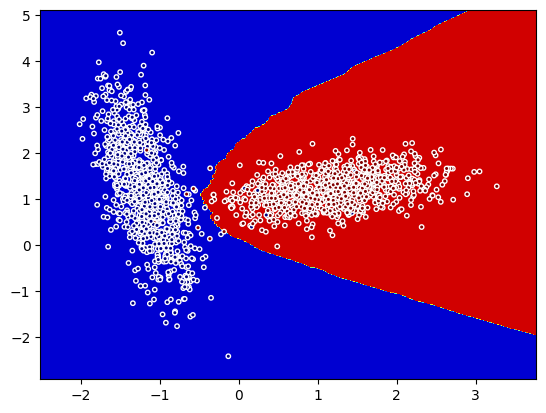

In [19]:
dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

yf = model.predict(Xf)
ym = yf.reshape(xm1.shape)

plt.contourf(xm1, xm2, ym, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='jet', edgecolors='w')

### Output

In [20]:
from scipy.stats import mode
from scipy.spatial.distance import mahalanobis
from sklearn.utils.extmath import weighted_mode

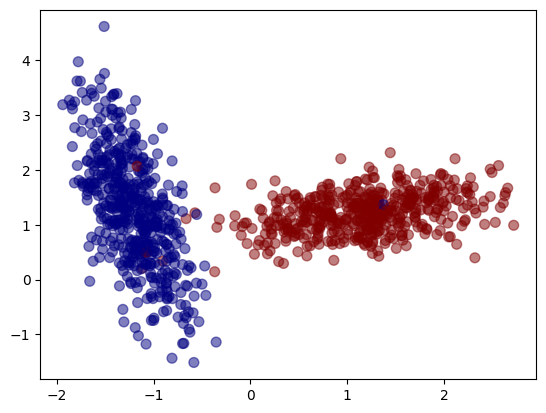

In [21]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='jet', alpha=0.5)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='jet', marker='s')

In [22]:
class KNNClassification:
    
    def __init__(self, k, metric='euclidean'):
        self.k = k
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.inv_cov = np.linalg.inv(np.cov(X.T))
    
    def predict(self, x):
        y_hats = []
        for xi in x:
            if self.metric == 'euclidean':
                distances = np.linalg.norm(self.X - xi, axis=1)
            elif self.metric == 'mahalanobis':
                distances = np.array([mahalanobis(xi, Xi, self.inv_cov) for Xi in self.X])
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y[indices] #list(map(lambda i: self.y[i], indices)) #[self.y[i] for i in indices]
            
            k_nearest_distances = distances[indices]
            weights = self._claculate_weights(k_nearest_distances)
            
            y_hat, _ = weighted_mode(k_nearest_labels, weights)
            y_hats.append(y_hat[0])
        return np.array(y_hats)
    
    def _claculate_weights(self, distances, const=0.01):
        weights = 1 / (distances + const)
        return weights

In [23]:
model = KNNClassification(10, 'euclidean')
model.fit(x_train, y_train)

y_hat = model.predict(x_test)
np.sum(y_hat == y_test)

989

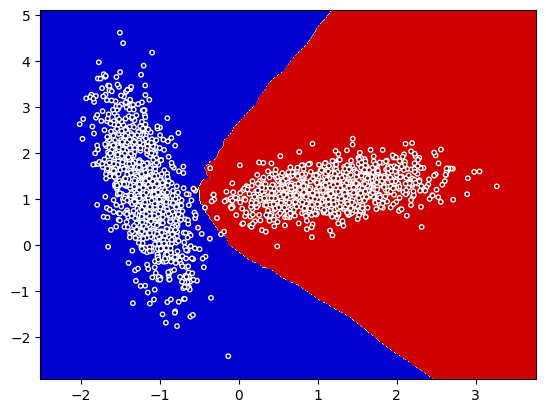

In [24]:
dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

yf = model.predict(Xf)
ym = yf.reshape(xm1.shape)

plt.contourf(xm1, xm2, ym, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='jet', edgecolors='w')